**Natural Language Generation** (NLG) is a subfield of Natural Language Processing (NLP) focused on automatically generating human-like language from structured or unstructured data. It involves converting computer-understandable information (like numerical data, symbols, or semantic representations) into coherent, meaningful text.

1. Human-Machine Communication
  
  Allows AI systems to communicate with users in natural, fluent language.

  Example: Chatbots, virtual assistants like Alexa, Siri.

2. Scalability in Content Creation
    
    Automates text generation at scale (news reports, product descriptions, summaries).

    Example: Weather.com uses NLG to generate weather reports.

3. Data Interpretation and Explanation
    
    Converts complex data or analytics into readable narratives.

    Example: BI dashboards using NLG to describe trends and anomalies.

In [ ]:
!pip install transformers --quiet


In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from transformers import BartForConditionalGeneration, BartTokenizer
from transformers import T5ForConditionalGeneration, T5Tokenizer
import torch

In [ ]:
gpt2_tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
gpt2_model = GPT2LMHeadModel.from_pretrained("gpt2")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [ ]:
bart_tokenizer = BartTokenizer.from_pretrained("facebook/bart-large")
bart_model = BartForConditionalGeneration.from_pretrained("facebook/bart-large")

In [ ]:
t5_tokenizer = T5Tokenizer.from_pretrained("t5-base")
t5_model = T5ForConditionalGeneration.from_pretrained("t5-base")

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [ ]:
prompt = input("Enter your story prompt: ")

Enter your story prompt: There was a pretty little fairy sitting under a tree


In [ ]:
gpt2_inputs = gpt2_tokenizer(prompt, return_tensors="pt")
gpt2_output = gpt2_model.generate(
    gpt2_inputs["input_ids"],
    max_length=200,
    temperature=0.8,
    top_p=0.9,
    top_k=50,
    do_sample=True,
    num_return_sequences=1
)
gpt2_story = gpt2_tokenizer.decode(gpt2_output[0], skip_special_tokens=True)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


In [ ]:
bart_inputs = bart_tokenizer(prompt, return_tensors="pt", max_length=1024, truncation=True)
bart_output = bart_model.generate(
    bart_inputs["input_ids"],
    max_length=200,
    temperature=0.8,
    top_p=0.9,
    top_k=50,
    do_sample=True
)
bart_story = bart_tokenizer.decode(bart_output[0], skip_special_tokens=True)

In [ ]:
t5_input_text = f"write a story: {prompt}"
t5_inputs = t5_tokenizer(t5_input_text, return_tensors="pt", max_length=512, truncation=True)
t5_output = t5_model.generate(
    t5_inputs["input_ids"],
    max_length=200,
    temperature=0.8,
    top_p=0.9,
    top_k=50,
    do_sample=True
)
t5_story = t5_tokenizer.decode(t5_output[0], skip_special_tokens=True)

**Model Architecture:**

Autoregressive Transformer Decoder-only architecture.

Trained to predict the next word in a sequence, which makes it inherently suited for text generation.

Uses self-attention and layer normalization with residual connections, enabling it to model long-range dependencies in text.

GPT-2 builds coherent text word-by-word, making it ideal for generating creative, free-form stories without needing input-output pairs like in translation or QA tasks.

Trained on WebText, a dataset of ~40GB of high-quality English text scraped from outbound Reddit links.

This includes creative writing, Wikipedia, books, blogs, and more — giving it a good sense of natural, narrative-style language.

In [ ]:
print("\n=== 📘 GPT-2 Generated Story ===\n")
print(gpt2_story)


=== 📘 GPT-2 Generated Story ===

There was a pretty little fairy sitting under a tree. The guy who was with me was like, 'What are you doing here?' And I said, 'This is where I am going to have a lot of fun.'

'And he said, 'You know, this is my place, so I am going to have to come to you.' And we were like, 'What?' And he said, 'I'm just going to come back to you.' I was like, 'Oh, yeah.'"

While the scene was filmed at the St. Louis Zoo, the family also had to make sure they could use the time to make sure they had a good time.

"We had to be very careful with it because if we were to have a bad time, then we'd be like, 'You guys have to be in this together,'" said the elder, who is also a trainer at the zoo. "We had to be very careful about how we made


BART (Bidirectional and Auto-Regressive Transformers) is a sequence-to-sequence model developed by Facebook AI (now Meta AI). It combines the strengths of BERT (bidirectional encoder) and GPT (auto-regressive decoder) into a denoising autoencoder architecture. This makes BART highly effective for text generation, summarization, translation, and other Natural Language Generation (NLG) tasks.



In [ ]:
print("\n=== 📗 BART Generated Story ===\n")
print(bart_story)


=== 📗 BART Generated Story ===

There was a pretty little fairy sitting under a tree


T5 is a Transformer-based encoder-decoder model developed by Google that frames every NLP task as a text-to-text problem. It uses a bidirectional encoder (like BERT) and a left-to-right decoder (like GPT), and is pretrained using a span-masking denoising objective.

In [ ]:
print("\n=== 📙 T5 Generated Story ===\n")
print(t5_story)


=== 📙 T5 Generated Story ===

a story:: I wanted to:: You could write a story: I would write a story: I had to write a story: There was a pretty little fairy sitting under a tree.


In [ ]:
# Sample prompt-story text
sample_data = """Once upon a time in a forest, a fairy found a talking flower.
The fairy listened to the flower's sad story and promised to help.
Together they flew over the forest, looking for a magical cure.
Eventually, they met a wise old tree that shared its secrets.
The flower bloomed again, and the forest sang with joy.

A lonely robot wandered through the abandoned city, searching for signs of life.
He found an old diary buried beneath rubble and read every page.
Inspired by the stories inside, he began restoring buildings one by one.
Soon, birds and squirrels returned, making the robot smile."""

# Save to file
with open("tiny_stories.txt", "w", encoding="utf-8") as f:
    f.write(sample_data)


In [ ]:
from transformers import GPT2TokenizerFast
from torch.utils.data import Dataset, DataLoader
import torch

tokenizer = GPT2TokenizerFast.from_pretrained("gpt2")
tokenizer.add_special_tokens({'pad_token': '[PAD]'})

# Read and tokenize each line
with open("tiny_stories.txt", "r") as f:
    lines = [line.strip() for line in f if line.strip()]

encodings = tokenizer(lines, truncation=True, padding="max_length", max_length=128, return_tensors="pt")

class GPT2StoryDataset(Dataset):
    def __init__(self, encodings):
        self.encodings = encodings
    def __len__(self):
        return len(self.encodings.input_ids)
    def __getitem__(self, idx):
        return {
            'input_ids': self.encodings.input_ids[idx],
            'attention_mask': self.encodings.attention_mask[idx],
            'labels': self.encodings.input_ids[idx],
        }

dataset = GPT2StoryDataset(encodings)
loader = DataLoader(dataset, batch_size=2, shuffle=True)


In [ ]:
from transformers import GPT2LMHeadModel
from torch.optim import AdamW
import torch # Import torch here

model = GPT2LMHeadModel.from_pretrained("gpt2")
model.resize_token_embeddings(len(tokenizer))
model.cuda()

optimizer = AdamW(model.parameters(), lr=5e-5)

model.train()
for epoch in range(3):
    print(f"Epoch {epoch+1}")
    for batch in loader:
        batch = {k: v.cuda() for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        print(f"Loss: {loss.item():.4f}")

Epoch 1


 20%|██        | 1/5 [00:12<00:50, 12.53s/it]

Loss: 14.2505


 40%|████      | 2/5 [00:19<00:27,  9.09s/it]

Loss: 12.5830


 60%|██████    | 3/5 [00:24<00:14,  7.42s/it]

Loss: 11.7296


 80%|████████  | 4/5 [00:30<00:06,  6.98s/it]

Loss: 11.4549


100%|██████████| 5/5 [00:34<00:00,  6.87s/it]


Loss: 11.0152
Epoch 2


 20%|██        | 1/5 [00:05<00:21,  5.45s/it]

Loss: 10.8860


 40%|████      | 2/5 [00:12<00:19,  6.43s/it]

Loss: 10.7543


 60%|██████    | 3/5 [00:17<00:11,  5.80s/it]

Loss: 10.6037


 80%|████████  | 4/5 [00:23<00:05,  5.95s/it]

Loss: 10.5963


100%|██████████| 5/5 [00:27<00:00,  5.43s/it]


Loss: 10.5915
Epoch 3


 20%|██        | 1/5 [00:06<00:26,  6.61s/it]

Loss: 10.4587


 40%|████      | 2/5 [00:11<00:16,  5.63s/it]

Loss: 10.3010


 60%|██████    | 3/5 [00:16<00:10,  5.31s/it]

Loss: 10.1807


 80%|████████  | 4/5 [00:22<00:05,  5.67s/it]

Loss: 10.2591


100%|██████████| 5/5 [00:26<00:00,  5.21s/it]

Loss: 10.0658


In [ ]:
model.save_pretrained("fine_tuned_gpt2")
tokenizer.save_pretrained("fine_tuned_gpt2")


('fine_tuned_gpt2/tokenizer_config.json',
 'fine_tuned_gpt2/special_tokens_map.json',
 'fine_tuned_gpt2/vocab.json',
 'fine_tuned_gpt2/merges.txt',
 'fine_tuned_gpt2/added_tokens.json',
 'fine_tuned_gpt2/tokenizer.json')

In [ ]:
from transformers import pipeline
generator = pipeline("text-generation", model="fine_tuned_gpt2", tokenizer=tokenizer)

prompt = "In a magical kingdom,"
output = generator(prompt, max_length=100, do_sample=True, top_k=50, top_p=0.95)
print(output[0]["generated_text"])


Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Both `max_new_tokens` (=256) and `max_length`(=100) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


In a magical kingdom, where you can be forgiven for wanting to throw away a few hundred gold coins each year, they'll let you try to buy anything you want, they'll give you a list of prices and they'll tell you how much they want you to buy it. The problem is that they're not very smart about it, but they're going to make money in the process.

Why did it take two years for them to make money in a decade? It was a mistake they made.

If you're wondering what happened after that, well, you might want to watch this video, which explains why there isn't a government-backed blockchain. If you're wondering why they're getting money out of it, well, they're probably trying to make a profit off of it.

Readers might wonder how they ended up with a $5 billion loss in bitcoins. The answer is simple: they couldn't find any interest in cryptocurrencies that weren't backed by crypto currencies.

The Ethereum Foundation's blockchain wasn't even invented until last year, when it was hacked. It was h

In [ ]:
!pip install -q transformers datasets


In [15]:
!pip install -q transformers datasets torch


In [ ]:
!wget -q https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt -O tiny_shakespeare.txt
text = open("tiny_shakespeare.txt", encoding="utf-8").read()
print(f"Loaded {len(text)} characters from Tiny Shakespeare.")


Loaded 1115394 characters from Tiny Shakespeare.


In [ ]:
lines = [l.strip() for l in text.split('\n') if len(l.strip()) > 0]
pairs = []
for i in range(0, len(lines)-3, 4):
    prompt = lines[i]
    story = lines[i+1] + " " + lines[i+2]
    pairs.append((prompt, story))
print(f"Created {len(pairs)} prompt-story pairs.")


Created 8194 prompt-story pairs.


In [ ]:
from transformers import GPT2TokenizerFast
from torch.utils.data import Dataset, DataLoader
import torch

tokenizer = GPT2TokenizerFast.from_pretrained("gpt2")
tokenizer.add_special_tokens({"pad_token": "[PAD]"})

texts = [p + " " + s for p, s in pairs]
encodings = tokenizer(texts, truncation=True, padding="max_length", max_length=128, return_tensors="pt")

class TextPairDataset(Dataset):
    def __init__(self, enc):
        self.enc = enc
    def __len__(self):
        return self.enc.input_ids.size(0)
    def __getitem__(self, i):
        return {
            "input_ids": self.enc.input_ids[i],
            "attention_mask": self.enc.attention_mask[i],
            "labels": self.enc.input_ids[i].clone()
        }

dataset = TextPairDataset(encodings)
loader = DataLoader(dataset, batch_size=2, shuffle=True)
print("Dataset and DataLoader ready.")


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

Dataset and DataLoader ready.


In [ ]:
!pip install -q transformers gradio


In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")
model.to("cuda" if torch.cuda.is_available() else "cpu")


GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [ ]:
def generate_story(prompt, max_len, temp, top_k, top_p):
    input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to(model.device)
    output = model.generate(
        input_ids,
        max_length=max_len,
        temperature=temp,
        top_k=top_k,
        top_p=top_p,
        do_sample=True,
        pad_token_id=tokenizer.eos_token_id
    )
    story = tokenizer.decode(output[0], skip_special_tokens=True)
    return story


In [16]:
import gradio as gr

with gr.Blocks(theme=gr.themes.Soft()) as demo:
    gr.Markdown("## ✨ GPT-2 Story Generator")
    gr.Markdown("Give a story prompt and watch GPT-2 complete it creatively!")

    with gr.Row():
        prompt = gr.Textbox(label="Your Story Prompt", placeholder="e.g., Once upon a time in a magical forest...")

    with gr.Row():
        max_len = gr.Slider(50, 300, value=100, label="Max Length")
        temp = gr.Slider(0.5, 1.5, value=1.0, label="Temperature")

    with gr.Row():
        top_k = gr.Slider(0, 100, value=50, label="Top-k Sampling")
        top_p = gr.Slider(0.0, 1.0, value=0.95, label="Top-p Sampling")

    generate_btn = gr.Button("🪄 Generate Story")
    output = gr.Textbox(label="Generated Story", lines=10)

    generate_btn.click(fn=generate_story, inputs=[prompt, max_len, temp, top_k, top_p], outputs=output)

demo.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://191ec4f46549039668.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [22]:
!pip install transformers evaluate nltk gradio rouge_score --quiet

import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, AutoModelForSeq2SeqLM
import evaluate
import nltk
import gradio as gr
import math

nltk.download('punkt')

  Preparing metadata (setup.py) ... done


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

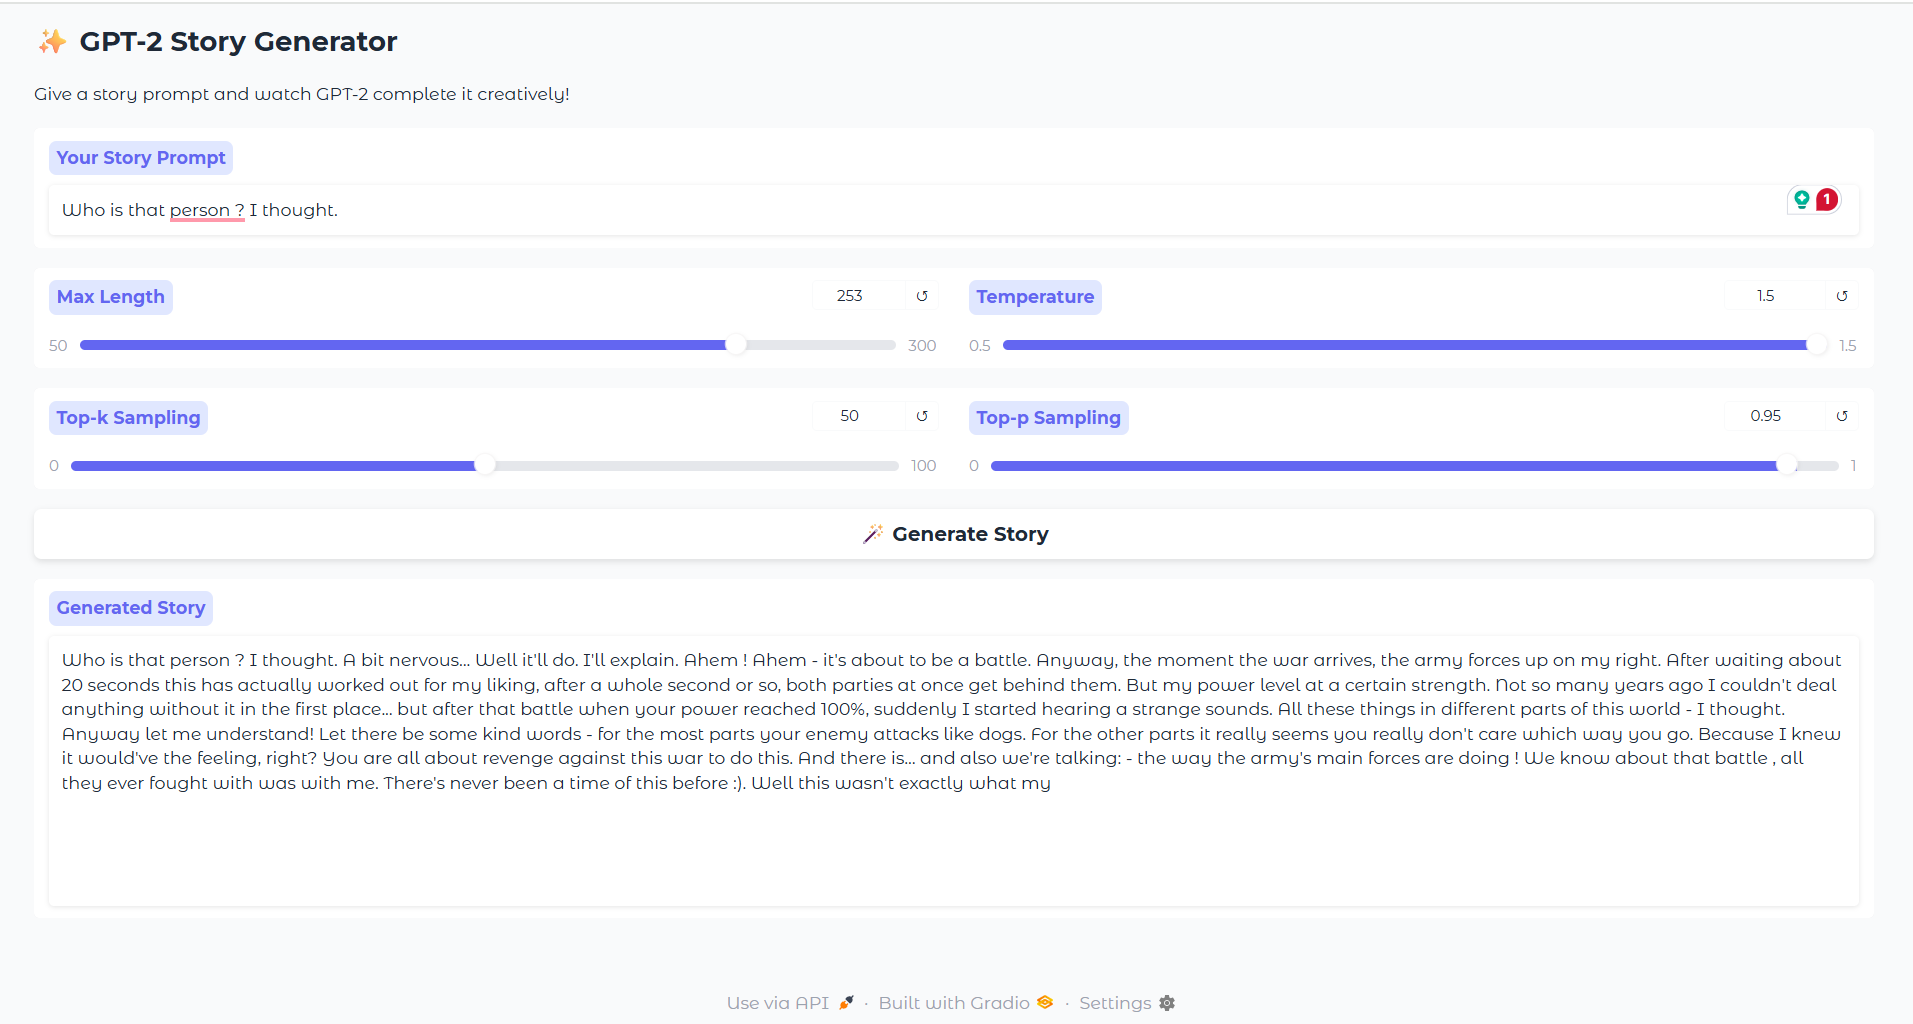

In [23]:
# Model configurations
MODELS = {
    "GPT-2": {"model_name": "gpt2", "causal": True},
    "FLAN-T5": {"model_name": "google/flan-t5-base", "causal": False},
    "DistilGPT-2": {"model_name": "distilgpt2", "causal": True}
}

# Load model/tokenizer
def load_model(model_info):
    tokenizer = AutoTokenizer.from_pretrained(model_info["model_name"])
    if tokenizer.pad_token is None:
        tokenizer.pad_token = tokenizer.eos_token
    if model_info["causal"]:
        model = AutoModelForCausalLM.from_pretrained(model_info["model_name"])
    else:
        model = AutoModelForSeq2SeqLM.from_pretrained(model_info["model_name"])
    return model, tokenizer

# Preprocess prompt
def preprocess_prompt(prompt, model_name):
    prompt = prompt.strip()
    if model_name in ["GPT-2", "DistilGPT-2"]:
        return f"Once upon a time, {prompt}"
    elif model_name == "FLAN-T5":
        return f"Write a story about: {prompt}"
    return prompt


In [24]:
# Load metrics
bleu_metric = evaluate.load("bleu")
rouge_metric = evaluate.load("rouge")

# Calculate perplexity
def calculate_perplexity(model, inputs, logits):
    loss = torch.nn.functional.cross_entropy(logits.view(-1, logits.size(-1)), inputs.input_ids.view(-1), ignore_index=model.config.pad_token_id)
    return math.exp(loss.item())

# Generate story
def generate_story(model_name, prompt, max_length, temperature, top_p):
    info = MODELS[model_name]
    model, tokenizer = load_model(info)
    model.eval()
    model.to("cuda" if torch.cuda.is_available() else "cpu")

    formatted_prompt = preprocess_prompt(prompt, model_name)
    device = model.device
    inputs = tokenizer(formatted_prompt, return_tensors="pt", padding=True, truncation=True).to(device)

    with torch.no_grad():
        output = model.generate(
            **inputs,
            max_length=max_length,
            temperature=temperature,
            top_p=top_p,
            do_sample=True,
            pad_token_id=tokenizer.pad_token_id
        )

    generated = tokenizer.decode(output[0], skip_special_tokens=True)
    if info["causal"]:
        story = generated.replace(formatted_prompt, "").strip()
    else:
        story = generated

    # Evaluation
    reference = "This is a placeholder reference story used for BLEU and ROUGE scoring."
    bleu = bleu_metric.compute(predictions=[story], references=[[reference]])["bleu"]
    rouge = rouge_metric.compute(predictions=[story], references=[reference])["rougeL"]

    # Perplexity (optional for FLAN)
    with torch.no_grad():
        outputs = model(**inputs, labels=inputs.input_ids)
    perplexity = torch.exp(outputs.loss).item()

    return story, f"{bleu:.4f}", f"{rouge:.4f}", f"{perplexity:.2f}"


In [25]:
def full_interface(prompt, model, max_length, temp, top_p, fluency, coherence, creativity):
    story, bleu, rouge, perplexity = generate_story(model, prompt, max_length, temp, top_p)
    avg_rating = (fluency + coherence + creativity) / 3
    feedback = (
        f"**BLEU:** {bleu}\n"
        f"**ROUGE-L:** {rouge}\n"
        f"**Perplexity:** {perplexity}\n\n"
        f"**Human Evaluation**:\n"
        f"- Fluency: {fluency}/5\n"
        f"- Coherence: {coherence}/5\n"
        f"- Creativity: {creativity}/5\n"
        f"- Avg Rating: {avg_rating:.2f}/5"
    )
    return story, feedback

gr.Interface(
    fn=full_interface,
    inputs=[
        gr.Textbox(label="Enter a story prompt"),
        gr.Dropdown(choices=list(MODELS.keys()), label="Model"),
        gr.Slider(100, 500, 300, step=50, label="Max Length"),
        gr.Slider(0.5, 1.5, 0.7, step=0.1, label="Temperature"),
        gr.Slider(0.5, 1.0, 0.9, step=0.05, label="Top-p"),
        gr.Slider(1, 5, 3, step=1, label="Fluency"),
        gr.Slider(1, 5, 3, step=1, label="Coherence"),
        gr.Slider(1, 5, 3, step=1, label="Creativity")
    ],
    outputs=[
        gr.Textbox(label="Generated Story"),
        gr.Markdown(label="Evaluation Results")
    ],
    title="📚 Story Generator and Evaluator",
    description="Generate stories using GPT-2, DistilGPT-2, or FLAN-T5 and evaluate them automatically and manually."
).launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://cba2269fdaf023aa3d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


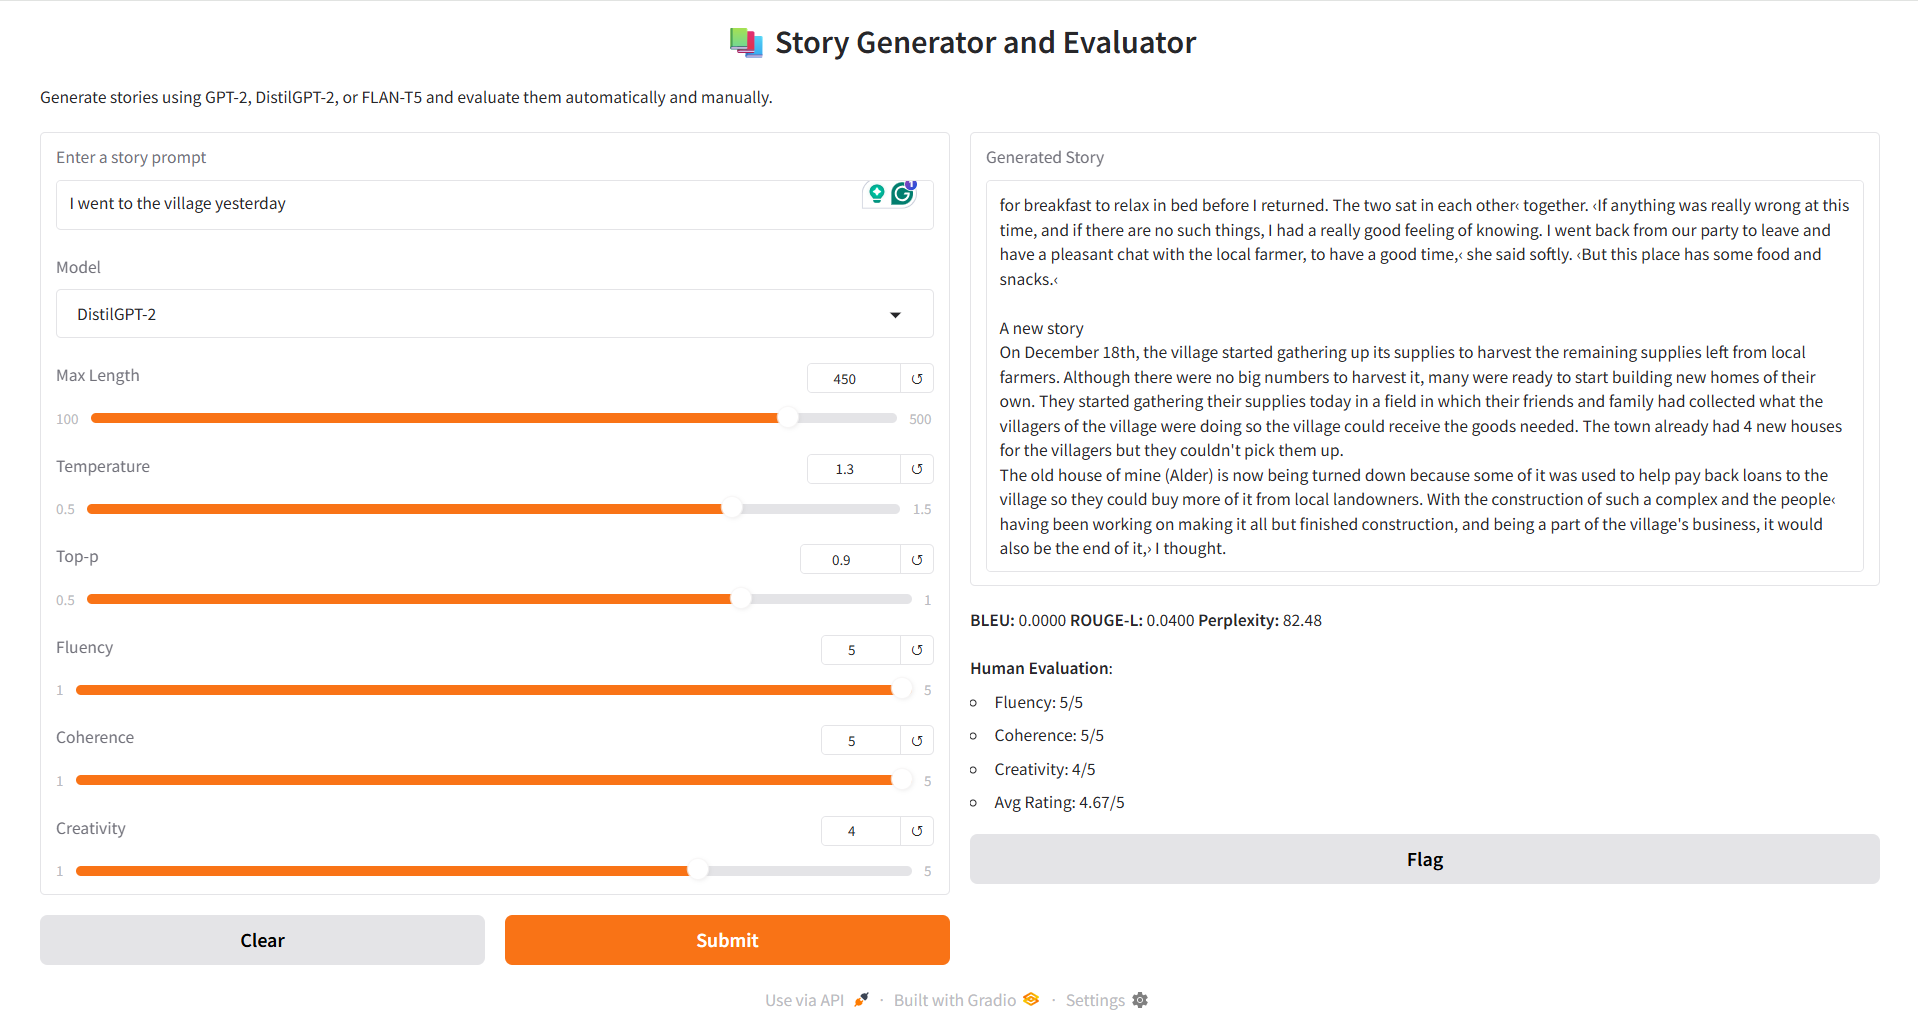

1. BLEU: 0.0000
Meaning: BLEU (Bilingual Evaluation Understudy) measures n-gram overlap between generated text and reference text.

Score = 0 suggests no n-gram overlap (or extremely rare overlap) between generated and reference texts.

Possible causes:

Generated text is too different in wording/style.

References are too few or too short.

The model generates fluent text, but it's not lexically similar to the target.

⚠️ BLEU isn't always ideal for open-ended tasks like story generation.

2. ROUGE-L: 0.0400
Meaning: ROUGE-L measures the longest common subsequence (LCS) between generated and reference texts.

Score = 0.04 means very low overlap, but not zero. Still weak.

Indicates that structural or phrasing similarity is low, even if content might be semantically similar.

3. Perplexity: 82.48
Meaning: Measures how “surprised” a model is by a text (lower is better).

Higher perplexity = the model finds the generated story unpredictable, i.e., possibly less fluent or poorly structured.

82.48 is relatively high, suggesting:

The model is undertrained.

The text lacks coherence or consistency.

Vocabulary mismatch with training corpus

Temperature
Controls the randomness of predictions in text generation.

Low temperature (e.g., 0.2) → More focused and repetitive.

High temperature (e.g., 1.0 or 1.5) → More creative and diverse.

Formula:
It's applied to logits before softmax:
logits = logits / temperature

2. Top-k Sampling
The model selects from the top-k most probable tokens at each step.

Example: If k=50, only the 50 most likely words are considered.

✅ Helps control diversity and coherence.

3. Top-p Sampling (Nucleus Sampling)
Selects the smallest set of top tokens whose cumulative probability exceeds p.

Example: If p=0.9, select the top tokens that together add up to 90% of probability mass.

✅ Adaptive and more dynamic than top-k.

4. Max Length
Sets the maximum number of tokens in the generated output.

Used to avoid excessively long or infinite generations.

Evaluation Metrics
5. BLEU Score (Bilingual Evaluation Understudy)
Measures n-gram overlap between generated and reference text.

Ranges from 0 to 1 (or 0–100).

Good for machine translation, but strict (exact match needed).

BLEU-1 = unigram overlap
BLEU-4 = up to 4-gram overlap

6. ROUGE Score (Recall-Oriented Understudy for Gisting Evaluation)
Measures recall-based overlap (especially useful for summarization).

Common versions:

ROUGE-1: unigram recall

ROUGE-2: bigram recall

ROUGE-L: longest common subsequence

✅ Better for comparing key content than BLEU.

7. Perplexity
Measures how well a language model predicts a sample.

Lower is better.

Formula:
Perplexity = 2^(-average log probability of predicted tokens)

A perplexity of 1 means perfect prediction; higher = worse.